# <center> <span style='color:#3c3b5f'>Ejercitación módulo Matplotlib</span></center>

Módulo Pandas - Parte práctica

**Profesor Adjunto:** Mag. Bioing. Baldezzari Lucas

<p style='text-align: left;'> V2022 </p>

<hr style="border:1px solid gray"> </hr>

## <span style='color:#55aa74'>1. Analizando datos de eficiencia energética (obligatorio)</span>

Cargue el archivo *eficienciaEnergética.csv*. Agregue una columna llamada *superficieTotal* que sea la suma de las columnas *Surface_Area, Wall_Area, Roof_Area*. Agreuge una columna llamada *cargaTotal* que sea la suma de *Heating_Load, Cooling_Load*.

Luego,

- Realice un gráfico de dispersión comparando *superficieTotal* con *cargaTotal*. Utilice los datos de la columna *Orientation* para diferenciar cada punto de la gráfica según la orientación de la casa.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## TODO 1
## TODO 1
pru= pd.read_csv("datasets/eficienciaEnergética.csv")
superfiec=pru[["Surface_Area", "Wall_Area", "Roof_Area"]].sum(axis=1)#sumo las filas de las columnas
prueba=pru.assign(superfiecieTotal=superfiec)#genero nuevo dataset con una columna superficieTotal
cargatot= prueba[["Heating_Load","Cooling_Load"]].sum(axis=1)
dataframe1=prueba.assign(cargaTotal=cargatot) #genero nuevo dataset con columna cargaTotal
dataframe1[["superfiecieTotal","cargaTotal"]].head(10)

,superfiecieTotal,cargaTotal
0,918.75,36.88
1,918.75,36.88
2,918.75,36.88
3,918.75,36.88
4,1004.50,49.12
5,1004.50,46.84
6,1004.50,45.87
7,1004.50,49.28
8,1029.00,46.80
9,1029.00,41.92


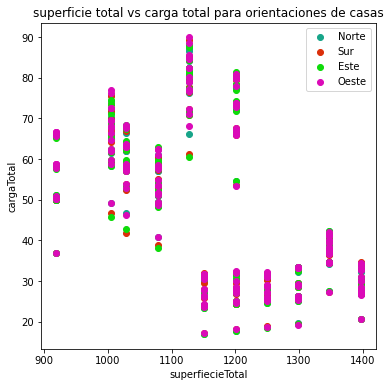

In [99]:
"""Genero nuevas variables para las orientaciones de las casas donde separo superficieTotal y cargaTotal por orientacion"""
fig, ax= plt.subplots()
ax.set_xlabel("superfiecieTotal")
ax.set_ylabel("cargaTotal")
ax.set_title("superficie total vs carga total para orientaciones de casas")
colors=["#17A589","#DB2F0A","#0EDB0A","#DB0AB8"]
labels=["Norte","Sur","Este","Oeste"]
for i in dataframe1["Orientation"].unique():
    values=dataframe1[dataframe1["Orientation"]==i][["superfiecieTotal","cargaTotal"]]
    ax.scatter(values["superfiecieTotal"],values["cargaTotal"], label = labels[i-2], color = colors[i-2])
ax.legend()
plt.show()

## <span style='color:#55aa74'>2. Personas en situación de calle (obligatorio)</span>

Utilizando los datos dentro de *sinhogares.csv* se le pide.

- Un gráfico de barras verticales donde se muestre el valor medio de individuos en situación de calles separados por *región*. Agregue el desvío estándar a cada barra.

In [6]:
## TODO 2
datan= pd.read_csv("datasets/sinhogares.csv")
datan.head()

,Unnamed: 0,region,estado,individuos,miembrosFamilia,poblacionTotal
0,0,East South Central,Alabama,2570,864,4887681
1,1,Pacific,Alaska,1434,582,735139
2,2,Mountain,Arizona,7259,2606,7158024
3,3,West South Central,Arkansas,2280,432,3009733
4,4,Pacific,California,109008,20964,39461588


In [7]:
pd.unique(datan["region"])

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Mid-Atlantic'], dtype=object)

In [8]:
"""Genero variable donde se guarden las columnas con media y desvio estandar para las cada region"""
media = datan[datan["region"].isin(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Mid-Atlantic'])].pivot_table(values = "individuos", index = "region",aggfunc = ["mean","std"])
media.iloc[:]

,mean,std
,individuos,individuos
region,,
East North Central,5081.200000,1830.780899
East South Central,3117.000000,2157.024648
Mid-Atlantic,18012.666667,18921.341399
Mountain,3561.375000,3143.438288
New England,2150.500000,2358.234658
Pacific,28427.200000,45428.961519
South Atlantic,5806.666667,6234.965998
West North Central,1995.857143,1371.731561


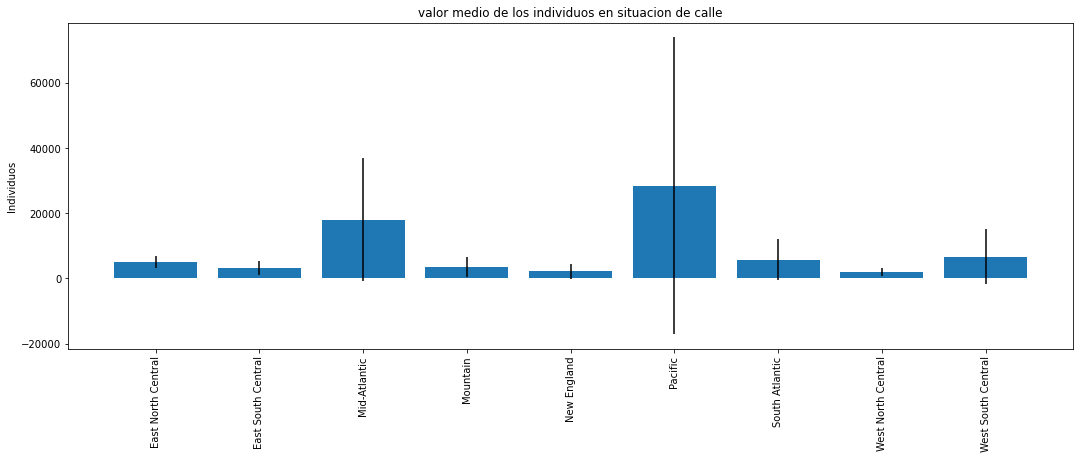

In [102]:
"""Grafico la media y desvio estandar por region"""
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(media.index, media.iloc[:,0].values, yerr = media.iloc[:,1])
ax.set_xticks([index for index in media.index]) #a mi tambien me salio warning hasta que puse esta linea del teorico ajjaja
ax.set_xticklabels(media.index, rotation=90)#esta tambien la saque del teorico xq era ilegible 
ax.set_ylabel("Individuos")
ax.set_title("valor medio de los individuos en situacion de calle")
plt.show()

## <span style='color:#55aa74'>3. Gráficas de ventas para Walmart (obligatorio)</span>

Utilizando los datos en *walmart.csv* realice lo siguiente.

- Un gráfico con 5 subplots diferentes en donde debe graficar las ventas semanales (a lo largo de todo el dataset) para los 5 departamentos con mayores ventas promedios.
- Un gráfico con las ventas semanales (a lo largo de todo el dataset) del departamento con mayor ventas semanales promedios. Agregue al gráfico **marcadores** en donde la columna *is_holiday* es igual a *True*. Puede agregar marcas a un gráfico del tipo `.plot()` usando el atributo `markevery`. Utilice [ésta](https://matplotlib.org/stable/gallery/lines_bars_and_markers/markevery_demo.html) referencia como ejemplo.

In [10]:
## TODO 3
walmart=pd.read_csv("datasets/walmart.csv")
walmart.head()


,store,type,department,date,weekly_sales,is_holiday,temperature,fuel_price,unemployment
0,1,A,1,2/5/2010,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,3/5/2010,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,4/2/2010,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,5/7/2010,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,6/4/2010,17558.09,False,27.050000,0.714586,7.808


In [11]:
subplot1=walmart[["department","weekly_sales", "date"]].sort_values("weekly_sales", ascending=False).set_index("department")[:5]
subplot1

,weekly_sales,date
department,,
92,293966.05,2/5/2010
72,232558.51,2/5/2010
72,218559.54,12/3/2010
92,214383.07,3/5/2010
95,213042.66,2/5/2010


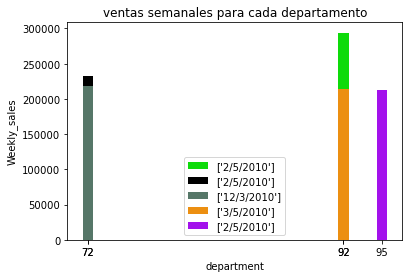

In [12]:

fig, ax=plt.subplots()
ax.bar(subplot1.index[:1],subplot1.iloc[:1,0].values,label = f"{subplot1.iloc[:1,1].values}", color = "#0EDB0A")
ax.bar(subplot1.index[1:2],subplot1.iloc[1:2,0].values,label = f"{subplot1.iloc[1:2,1].values}",color = "#000000")
ax.bar(subplot1.index[2:3],subplot1.iloc[2:3,0].values,label = f"{subplot1.iloc[2:3,1].values}",color = "#567768")
ax.bar(subplot1.index[3:4],subplot1.iloc[3:4,0].values,label = f"{subplot1.iloc[3:4,1].values}",color = "#EC8F11")
ax.bar(subplot1.index[4:5],subplot1.iloc[4:5,0].values,label = f"{subplot1.iloc[4:5,1].values}",color = "#A311EC")
ax.set_xticks([index for index in subplot1.index])
ax.set_xticklabels(subplot1.index) 
ax.set_ylabel("Weekly_sales")
ax.set_xlabel("department")
ax.set_title("ventas semanales para cada departamento")
ax.legend()
plt.show()

In [13]:
fill=walmart[walmart["is_holiday"]==True]
unicos=pd.unique(fill["department"])
unicos.shape

(12,)

In [14]:
medi = walmart[walmart["department"].isin([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43])].pivot_table(values = "weekly_sales", index = "department",aggfunc = np.mean)
maxima=medi.sort_values(by=["weekly_sales"],ascending=False)
departamento=list(maxima.iloc[:1].index)
departamento


[92]

In [15]:
depamax=walmart[walmart["department"]==departamento[0]]
depamax

,store,type,department,date,weekly_sales,is_holiday,temperature,fuel_price,unemployment
806,1,A,92,2/5/2010,139884.94,False,5.727778,0.679451,8.106
807,1,A,92,3/5/2010,132945.44,False,8.055556,0.693452,8.106
808,1,A,92,4/2/2010,126907.41,False,16.816667,0.718284,7.808
809,1,A,92,5/7/2010,132217.62,False,22.527778,0.748928,7.808
810,1,A,92,6/4/2010,126058.88,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10686,39,A,92,9/3/2010,103043.03,False,27.850000,0.680772,8.360
10687,39,A,92,10/1/2010,95209.15,False,22.633333,0.687640,8.476
10688,39,A,92,11/5/2010,102982.37,False,16.455556,0.710359,8.476
10689,39,A,92,12/3/2010,97304.18,False,11.972222,0.715378,8.476


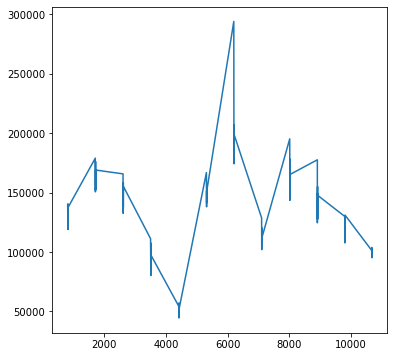

In [21]:
plt.plot(depamax["weekly_sales"], markevery=unicos.shape[0])
plt.show()

## <span style='color:#55aa74'>4. Graficando datos del FIFA 2021(obligatorio)</span>

A partir de los datos en el set de datos *fifa2021.csv* realice,

- Un gráfico de barras horizontales con la cantidad de jugadores divididos por países.
- Histogramas (en un mismo gráfico) de las alturas (columna *height_cm*) para jugadores de Argentina, Uruguay, Alemania, Nigeria y Kosovo.

**¿Qué liga vale más dinero?**

- Realice un gráfico de barras verticales en donde se muestre el valor en euros de las ligas en la lista `ligas` en base a los precios de los jugadores que juegan en ella.

```python
ligas = ['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga', 'French Ligue 1', 'English Premier League', 'Holland Eredivisie', 'USA Major League Soccer', 'Chinese Super League', 'Saudi Abdul L. Jameel League', 'Turkish Süper Lig', 'Argentina Primera División', 'Uruguayan Primera División']
```

- Repita el ejercicio 5.1 de la *guía de ejercicios de Pandas*. Luego realice un gráfico de dispersión en donde se compare el precio de cada jugador con su *overall*. Discrimine los colores de los puntos en base a la columna *onePosition* obtenida luego de resolver la parte 5.1.

In [17]:
## TODO 4
fifa= pd.read_csv("datasets/fifa2021.csv")
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,6/24/1987,170,72,Argentina,FC Barcelona,...,NaN,35,24,6,11,15,14,8,89+3,89+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,2/5/1985,187,83,Portugal,Juventus,...,NaN,32,24,7,11,15,14,11,91+1,91+1
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1/7/1993,188,87,Slovenia,Atlético Madrid,...,NaN,12,18,87,92,78,90,90,33+3,33+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,8/21/1988,184,80,Poland,FC Bayern München,...,NaN,42,19,15,6,12,8,10,89+2,89+2
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,2/5/1992,175,68,Brazil,Paris Saint-Germain,...,NaN,30,29,9,9,15,15,11,84+3,84+3


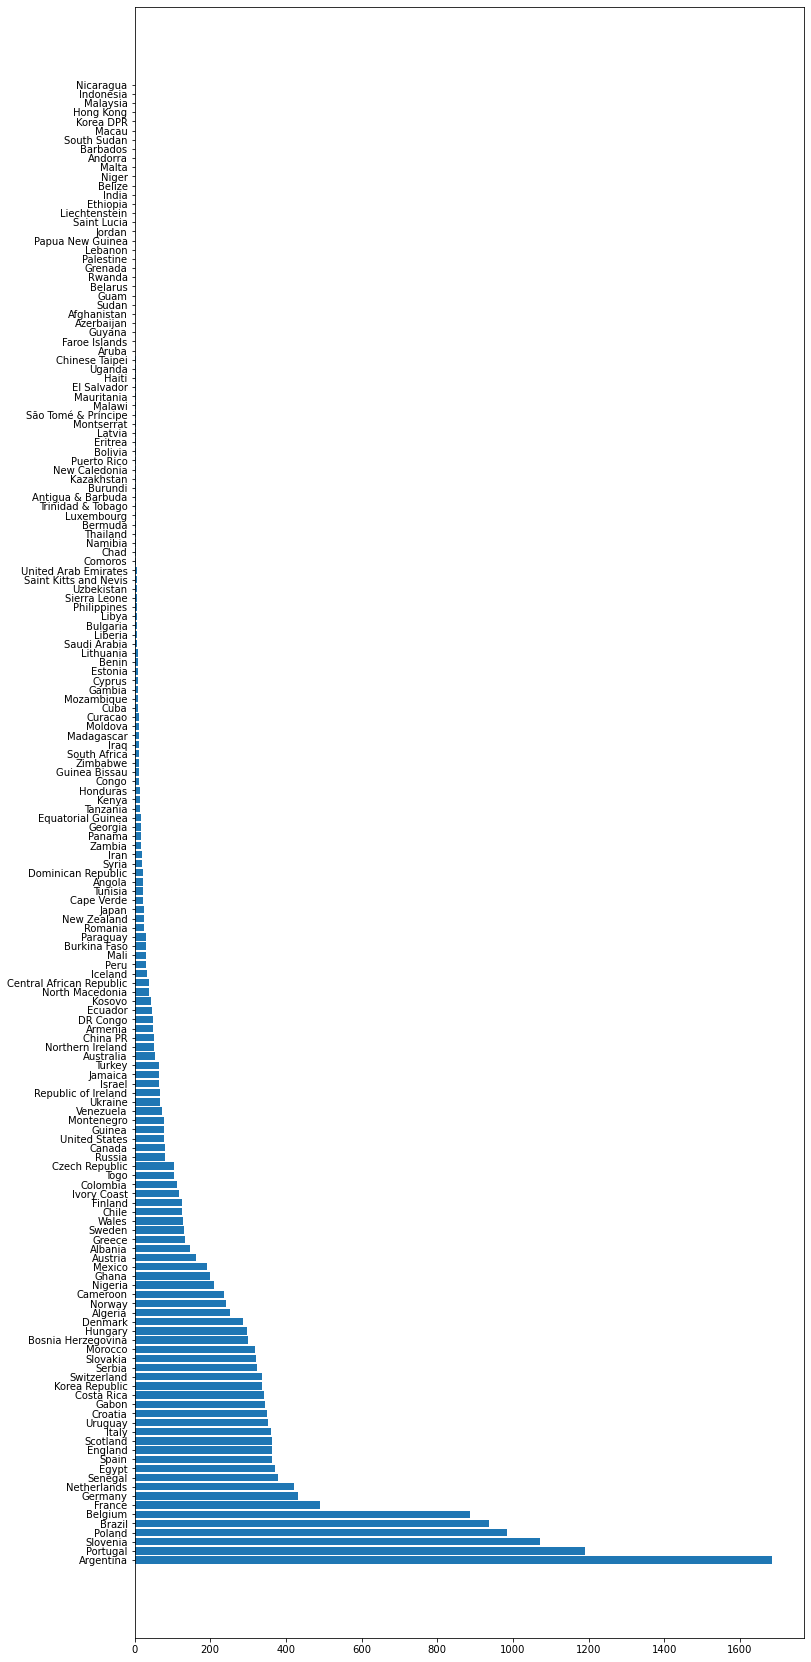

In [18]:
plt.rcParams["figure.figsize"] = (12, 30)#pa que se vean los paises
plt.barh(pd.unique(fifa["nationality"]),fifa["nationality"].value_counts(), )
plt.show()

In [19]:
"""Histogramas (en un mismo gráfico) 
de las alturas (columna *height_cm*) para jugadores de Argentina, Uruguay, Alemania, Nigeria y Kosovo."""
Argentina=fifa.loc[fifa["nationality"]=="Argentina", ["height_cm"]]
Uruguay=fifa.loc[fifa["nationality"]=="Uruguay", ["height_cm"]]
Alemania= fifa.loc[fifa["nationality"]=="Alemania", ["height_cm"]]
Nigeria=fifa.loc[fifa["nationality"]=="Nigeria", ["height_cm"]]
Kosovo=fifa.loc[fifa["nationality"]=="Kosovo", ["height_cm"]]


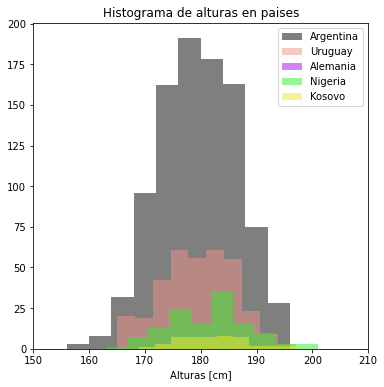

In [108]:
plt.rcParams["figure.figsize"] = (6, 6)#revierto el tamaño
fig, ax = plt.subplots()
listitao=["Argentina","Uruguay","Alemania","Nigeria","Kosovo"]
colores=["#000000","#F1948A","#A311EC","#31EC2E","#ECE92E"]
ax.set_xlabel("Alturas [cm]")
ax.set_ylabel("")
ax.set_title("Histograma de alturas en paises")
for i,j in zip(listitao,colores):
    pais=fifa[fifa["nationality"]==i][["height_cm"]]
    ax.hist(pais, label = i, color = j, alpha=0.5)

plt.xlim(150,210)
plt.legend()
plt.show()

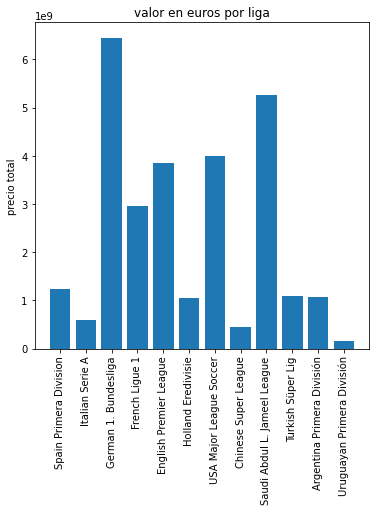

In [75]:
""" Realice un gráfico de barras verticales en donde se muestre el valor en 
euros de las ligas en la lista `ligas` en base a los precios de los jugadores que juegan en ella."""
ligas = ['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga', 'French Ligue 1', 'English Premier League', 'Holland Eredivisie', 'USA Major League Soccer', 'Chinese Super League', 'Saudi Abdul L. Jameel League', 'Turkish Süper Lig', 'Argentina Primera División', 'Uruguayan Primera División']
sumas = fifa[fifa["league_name"].isin(ligas)].pivot_table(values = "value_eur", index = "league_name",aggfunc = np.sum)
fig, ax= plt.subplots()
ax.bar(ligas,sumas.values[:,0])
ax.set_xticks([index for index in sumas.index]) 
ax.set_xticklabels(sumas.index, rotation=90)
ax.set_ylabel("precio total")
ax.set_title("valor en euros por liga")
plt.show()


In [84]:
nuevalistt=[]
listita=[]
for i in fifa["player_positions"]:
    nuevalistt.append(i[:2])
for j in nuevalistt:
    if j == 'ST'or j =='CF'or j =='RW'or j =='LW':
        listita.append("Atacante")
    elif j =="LM" or j == "RM"or j =="CM"or j =="CD"or j =="CA":
        listita.append("Mediocampista")
    elif j == "LB"or  j == "RB" or j == "CB" or j == "LW":
        listita.append("Defensor")
    elif j =='GK':
        listita.append("Arquero")
        
fifa21=fifa.assign(onePosition=listita)

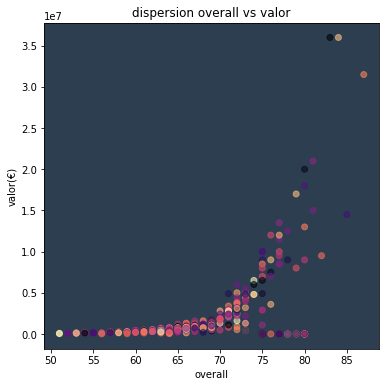

In [89]:
"""Repita el ejercicio 5.1 de la *guía de ejercicios de Pandas*. Luego realice un gráfico de 
dispersión en donde se compare el precio de cada jugador con su *overall*. Discrimine los 
colores de los puntos en base a la columna *onePosition* obtenida luego de resolver la parte 5.1."""
jugadoresUruguay = fifa21[fifa21["nationality"].isin(["Uruguay"])][["onePosition","value_eur","overall"]]
fig, ax = plt.subplots()

colors = np.random.rand(jugadoresUruguay["onePosition"].shape[0])
ax.scatter(jugadoresUruguay["overall"],jugadoresUruguay["value_eur"], alpha = 0.6, c = colors, cmap = "magma_r")
ax.set_facecolor("#2C3E50")
ax.set_xlabel("overall")
ax.set_ylabel("valor(€)")
ax.set_title("dispersion overall vs valor")
plt.show()


<hr style="border:1px solid #2C3E50"> </hr>

### FIN